<a href="https://colab.research.google.com/github/Shreeranga1/CapstoneTeam-/blob/main/Team2_12_07_22_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!unzip /content/drive/MyDrive/capstone/test.zip -d /content/sample_data/images

In [4]:
import seaborn as sns 
import matplotlib as mlp 
import matplotlib.pyplot as plt 
import cv2
from tqdm import tqdm_notebook as tqdm
import zipfile 
import io
import warnings 
warnings.filterwarnings("ignore")
from keras.preprocessing.image import load_img, img_to_array
from keras.preprocessing.image import ImageDataGenerator 
from keras.engine import sequential
from keras import  layers, models
from keras.layers import Dense
import tensorflow as tf
# !pip install hyperopt
# !pip install hyperas
from hyperopt import Trials, STATUS_OK, tpe
# from hyperas.distributions import choice, uniform
from __future__ import print_function
import gc; 
import tensorflow.python.keras.backend as K
# from hyperas import optim
from hyperopt import Trials, STATUS_OK, tpe
from keras.datasets import mnist
from keras.layers.core import Dense, Dropout, Activation
from keras.models import Sequential
from keras.utils import np_utils
import numpy as np
# from hyperas import optim
# from keras.models import model_from_json
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers.convolutional import Convolution2D, MaxPooling2D
import tensorflow as tf
import tensorflow
import os
from tensorflow.keras.optimizers import Adam,SGD,RMSprop
from keras.layers import Dropout
from tensorflow.keras.optimizers import RMSprop,SGD,Adam
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
import tensorflow as tf 
import os 
from keras.preprocessing.image import load_img, img_to_array
from keras.preprocessing.image import ImageDataGenerator 
from keras.layers import Dense, Input, Flatten, Conv2D, Activation, MaxPooling2D,BatchNormalization, GlobalAveragePooling2D
from keras.models import Model, Sequential
!pip install optuna
import optuna
from optuna.samplers import RandomSampler

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 308 kB 8.2 MB/s 
     |████████████████████████████████| 81 kB 9.7 MB/s 
     |████████████████████████████████| 209 kB 49.6 MB/s 
     |████████████████████████████████| 78 kB 7.7 MB/s 
     |████████████████████████████████| 147 kB 47.7 MB/s 
     |████████████████████████████████| 112 kB 51.2 MB/s 
     |████████████████████████████████| 49 kB 5.3 MB/s 
  Created wheel for pyperclip: filename=pyperclip-1.8.2-py3-none-any.whl size=11137 sha256=08605df7917b9ac1351790b6e1fd40af75fe38e66429b9a17550ad65abc93d11
  Stored in directory: /root/.cache/pip/wheels/9f/18/84/8f69f8b08169c7bae2dde6bd7daf0c19fca8c8e500ee620a28
Successfully built pyperclip


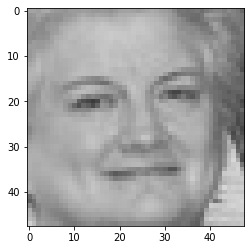

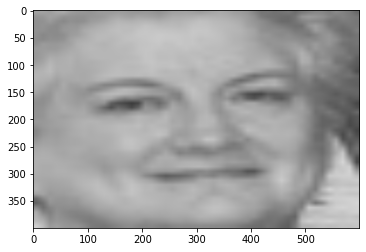

In [5]:
pic = cv2.imread('/content/sample_data/images/images/train/happy/100.jpg')
plt.imshow(pic)
plt.show()

up_width = 600
up_height = 400 
up_points = (up_width, up_height)
resized_up = cv2.resize(pic,up_points, interpolation = cv2.INTER_LINEAR)

plt.imshow(resized_up)
plt.show()

In [6]:
pic_size= 48
path = '/content/sample_data/images/images'

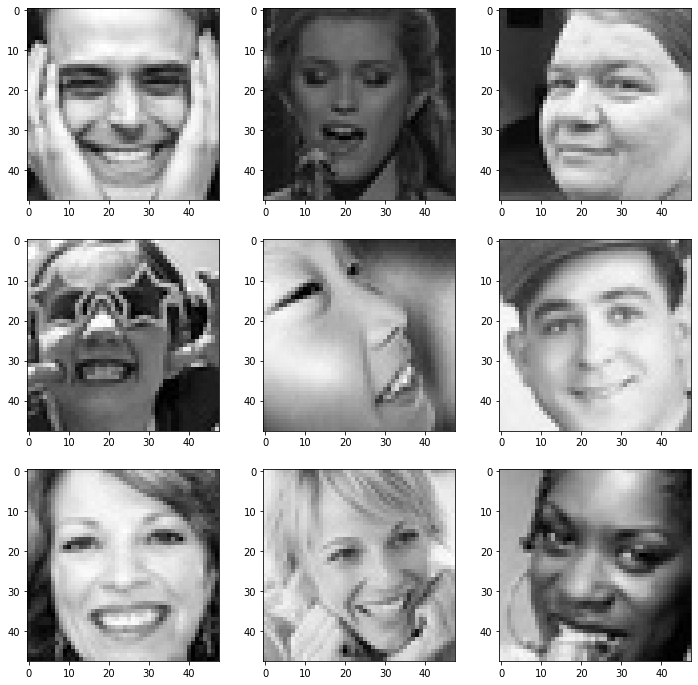

In [11]:
expression = 'happy'

plt.figure(figsize=(12,12))
for i in range(1,10,1):
    plt.subplot(3,3,i)
    img = load_img(path+'/train/'+expression+'/'
                  + os.listdir(path+'/train/'+expression)[i],target_size=(pic_size,pic_size))
    plt.imshow(img)
plt.show()

In [7]:
batch_size = 128 
datagen_train= ImageDataGenerator()
datagen_val = ImageDataGenerator()

train_set = datagen_train.flow_from_directory(path+'/train',
                                             target_size= (pic_size,pic_size),
                                             color_mode = 'grayscale',
                                             batch_size=batch_size,
                                             class_mode='categorical',
                                             shuffle=True)
test_set = datagen_val.flow_from_directory(path+'/validation',
                                             target_size= (pic_size,pic_size),
                                             color_mode = 'grayscale',
                                             batch_size=batch_size,
                                             class_mode='categorical',
                                             shuffle=False)

Found 28821 images belonging to 7 classes.
Found 7066 images belonging to 7 classes.


In [ ]:
def evalmodel(trial):
    
    # optimization
    tensorflow.random.set_seed(2)
    n_layers = trial.suggest_int("dense_Input", 50,300,step=50)
    learning_rate = trial.suggest_loguniform('learning_rate', 1e-4, 1e-1)
    batch = trial.suggest_int("number_of_batches", 16,512,step=16)

    train_set = datagen_train.flow_from_directory(path+'/train',
                                             target_size= (pic_size,pic_size),
                                             color_mode = 'grayscale',
                                             batch_size=batch,
                                             class_mode='categorical',
                                             shuffle=True)
    test_set = datagen_val.flow_from_directory(path+'/validation',
                                             target_size= (pic_size,pic_size),
                                             color_mode = 'grayscale',
                                             batch_size=batch,
                                             class_mode='categorical',
                                             shuffle=False)

    no_of_classes = 7
    model = Sequential()
  #1st CNN layer
    model.add(Conv2D(64,(3,3),padding = 'same',input_shape = (48,48,1)))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size = (2,2)))
    model.add(Dropout(0.25))

#2nd CNN layer
    model.add(Conv2D(128,(5,5),padding = 'same'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size = (2,2)))
    model.add(Dropout (0.25))

#3rd CNN layer
    model.add(Conv2D(512,(3,3),padding = 'same'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size = (2,2)))
    model.add(Dropout (0.25))

#4th CNN layer
    model.add(Conv2D(512,(3,3), padding='same'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    model.add(Flatten())

#Fully connected 1st layer
    model.add(Dense(n_layers))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dropout(0.25))


# Fully connected layer 2nd layer
    model.add(Dense(512))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dropout(0.25))

    model.add(Dense(no_of_classes, activation='softmax'))



#     opt = Adam(lr = learning_rate)
#     model.compile(optimizer=opt,loss='categorical_crossentropy', metrics=['accuracy'])
  # model.summary()

#     checkpoint = ModelCheckpoint("./model.h5", monitor='val_acc', verbose=1, save_best_only=True, mode='max')
#Stopping training when a monitored metric has stopped improving.
#     early_stopping = EarlyStopping(monitor='val_loss',
#                           min_delta=0,
#                           patience=3,
#                           verbose=1,
#                           restore_best_weights=True
#                           )

#     reduce_learningrate = ReduceLROnPlateau(monitor='val_loss',
#                               factor=0.2,
#                               patience=3,
#                               verbose=1,
#                               min_delta=0.0001)

#     callbacks_list = [early_stopping,checkpoint,reduce_learningrate]

    epochs = 35

    model.compile(loss='categorical_crossentropy',
              optimizer = Adam(lr=learning_rate),
              metrics=['accuracy'])
    history = model.fit_generator(generator=train_set,
                                steps_per_epoch=train_set.n//train_set.batch_size,
                                epochs=epochs,
                                validation_data = test_set,
                                validation_steps = test_set.n//test_set.batch_size,
#                                 callbacks=callbacks_list
                                )
    return max(history.history['val_accuracy'])

In [8]:
help(optuna.create_study)

Help on function create_study in module optuna.study.study:

create_study(storage: Union[str, optuna.storages._base.BaseStorage, NoneType] = None, sampler: Union[ForwardRef('samplers.BaseSampler'), NoneType] = None, pruner: Union[optuna.pruners._base.BasePruner, NoneType] = None, study_name: Union[str, NoneType] = None, direction: Union[str, optuna.study._study_direction.StudyDirection, NoneType] = None, load_if_exists: bool = False, *, directions: Union[Sequence[Union[str, optuna.study._study_direction.StudyDirection]], NoneType] = None) -> optuna.study.study.Study
    Create a new :class:`~optuna.study.Study`.
    
    Example:
    
        .. testcode::
    
            import optuna
    
    
            def objective(trial):
                x = trial.suggest_float("x", 0, 10)
                return x ** 2
    
    
            study = optuna.create_study()
            study.optimize(objective, n_trials=3)
    
    Args:
        storage:
            Database URL. If this argument i

In [ ]:
study= optuna.create_study(direction='maximize')
study.optimize(evalmodel,n_trials=25)

[I 2022-07-19 06:39:01,552] A new study created in memory with name: no-name-5db261e5-8b9e-4af2-8141-22dc33171fc7


Found 28821 images belonging to 7 classes.
Found 7066 images belonging to 7 classes.
Epoch 1/25
62/62 [==============================] - 11s 137ms/step - loss: 1.9191 - accuracy: 0.2607 - val_loss: 3.7322 - val_accuracy: 0.1435
Epoch 2/25
62/62 [==============================] - 8s 131ms/step - loss: 1.6149 - accuracy: 0.3800 - val_loss: 1.5327 - val_accuracy: 0.4115
Epoch 3/25
62/62 [==============================] - 8s 129ms/step - loss: 1.4389 - accuracy: 0.4470 - val_loss: 1.7572 - val_accuracy: 0.3695
Epoch 4/25
62/62 [==============================] - 8s 129ms/step - loss: 1.3153 - accuracy: 0.4958 - val_loss: 1.3364 - val_accuracy: 0.4977
Epoch 5/25
62/62 [==============================] - 8s 129ms/step - loss: 1.2308 - accuracy: 0.5296 - val_loss: 1.3331 - val_accuracy: 0.5013
Epoch 6/25
62/62 [==============================] - 9s 144ms/step - loss: 1.1701 - accuracy: 0.5537 - val_loss: 1.3839 - val_accuracy: 0.5132
Epoch 7/25
62/62 [==============================] - 8s 135ms/s

[I 2022-07-19 06:42:48,850] Trial 0 finished with value: 0.6311781406402588 and parameters: {'dense_Input': 300, 'learning_rate': 0.0012152539371337284, 'number_of_batches': 464}. Best is trial 0 with value: 0.6311781406402588.


Found 28821 images belonging to 7 classes.
Found 7066 images belonging to 7 classes.
Epoch 1/25
128/128 [==============================] - 11s 74ms/step - loss: 1.9141 - accuracy: 0.2379 - val_loss: 2.7462 - val_accuracy: 0.1384
Epoch 2/25
128/128 [==============================] - 9s 70ms/step - loss: 1.5840 - accuracy: 0.3824 - val_loss: 1.9221 - val_accuracy: 0.2791
Epoch 3/25
128/128 [==============================] - 9s 70ms/step - loss: 1.3548 - accuracy: 0.4782 - val_loss: 1.7103 - val_accuracy: 0.3512
Epoch 4/25
128/128 [==============================] - 10s 79ms/step - loss: 1.2386 - accuracy: 0.5281 - val_loss: 1.7946 - val_accuracy: 0.2668
Epoch 5/25
128/128 [==============================] - 9s 70ms/step - loss: 1.1596 - accuracy: 0.5580 - val_loss: 1.5674 - val_accuracy: 0.3802
Epoch 6/25
128/128 [==============================] - 9s 69ms/step - loss: 1.0883 - accuracy: 0.5863 - val_loss: 1.4413 - val_accuracy: 0.4647
Epoch 7/25
128/128 [==============================] - 9

[I 2022-07-19 06:46:55,186] Trial 1 finished with value: 0.610023021697998 and parameters: {'dense_Input': 300, 'learning_rate': 0.0069249678174871975, 'number_of_batches': 224}. Best is trial 0 with value: 0.6311781406402588.


Found 28821 images belonging to 7 classes.
Found 7066 images belonging to 7 classes.
Epoch 1/25
81/81 [==============================] - 11s 113ms/step - loss: 1.9777 - accuracy: 0.2401 - val_loss: 76.0314 - val_accuracy: 0.1618
Epoch 2/25
81/81 [==============================] - 8s 103ms/step - loss: 1.7574 - accuracy: 0.2999 - val_loss: 1.7621 - val_accuracy: 0.3040
Epoch 3/25
81/81 [==============================] - 8s 103ms/step - loss: 1.5585 - accuracy: 0.3899 - val_loss: 2.4108 - val_accuracy: 0.1334
Epoch 4/25
81/81 [==============================] - 8s 103ms/step - loss: 1.4122 - accuracy: 0.4523 - val_loss: 1.7279 - val_accuracy: 0.3430
Epoch 5/25
81/81 [==============================] - 8s 103ms/step - loss: 1.3125 - accuracy: 0.4938 - val_loss: 1.4359 - val_accuracy: 0.4324
Epoch 6/25
81/81 [==============================] - 8s 103ms/step - loss: 1.2448 - accuracy: 0.5204 - val_loss: 1.5458 - val_accuracy: 0.3783
Epoch 7/25
81/81 [==============================] - 8s 102ms/

[I 2022-07-19 06:50:52,026] Trial 2 finished with value: 0.6154829263687134 and parameters: {'dense_Input': 100, 'learning_rate': 0.01964287485954101, 'number_of_batches': 352}. Best is trial 0 with value: 0.6311781406402588.


Found 28821 images belonging to 7 classes.
Found 7066 images belonging to 7 classes.
Epoch 1/25
200/200 [==============================] - 11s 48ms/step - loss: 1.8233 - accuracy: 0.2995 - val_loss: 1.6303 - val_accuracy: 0.3729
Epoch 2/25
200/200 [==============================] - 10s 51ms/step - loss: 1.4790 - accuracy: 0.4311 - val_loss: 1.5716 - val_accuracy: 0.4391
Epoch 3/25
200/200 [==============================] - 10s 48ms/step - loss: 1.3093 - accuracy: 0.4990 - val_loss: 1.3773 - val_accuracy: 0.4823
Epoch 4/25
200/200 [==============================] - 9s 47ms/step - loss: 1.2195 - accuracy: 0.5382 - val_loss: 1.2230 - val_accuracy: 0.5223
Epoch 5/25
200/200 [==============================] - 9s 46ms/step - loss: 1.1505 - accuracy: 0.5645 - val_loss: 1.1575 - val_accuracy: 0.5578
Epoch 6/25
200/200 [==============================] - 9s 46ms/step - loss: 1.0913 - accuracy: 0.5862 - val_loss: 1.1650 - val_accuracy: 0.5565
Epoch 7/25
200/200 [==============================] - 

[I 2022-07-19 06:55:55,975] Trial 3 finished with value: 0.6387471556663513 and parameters: {'dense_Input': 300, 'learning_rate': 0.0008276630026239043, 'number_of_batches': 144}. Best is trial 3 with value: 0.6387471556663513.


Found 28821 images belonging to 7 classes.
Found 7066 images belonging to 7 classes.
Epoch 1/25
56/56 [==============================] - 10s 147ms/step - loss: 1.9333 - accuracy: 0.2379 - val_loss: 16.4726 - val_accuracy: 0.1720
Epoch 2/25
56/56 [==============================] - 8s 142ms/step - loss: 1.6403 - accuracy: 0.3641 - val_loss: 1.7110 - val_accuracy: 0.3280
Epoch 3/25
56/56 [==============================] - 8s 141ms/step - loss: 1.4273 - accuracy: 0.4518 - val_loss: 1.5489 - val_accuracy: 0.3936
Epoch 4/25
56/56 [==============================] - 8s 142ms/step - loss: 1.2945 - accuracy: 0.5023 - val_loss: 1.7596 - val_accuracy: 0.3589
Epoch 5/25
56/56 [==============================] - 8s 144ms/step - loss: 1.2066 - accuracy: 0.5376 - val_loss: 1.3839 - val_accuracy: 0.4546
Epoch 6/25
56/56 [==============================] - 8s 144ms/step - loss: 1.1493 - accuracy: 0.5640 - val_loss: 1.4625 - val_accuracy: 0.4522
Epoch 7/25
56/56 [==============================] - 8s 142ms/

[I 2022-07-19 06:59:41,989] Trial 4 finished with value: 0.6095252633094788 and parameters: {'dense_Input': 200, 'learning_rate': 0.003972313022168907, 'number_of_batches': 512}. Best is trial 3 with value: 0.6387471556663513.


Found 28821 images belonging to 7 classes.
Found 7066 images belonging to 7 classes.
Epoch 1/25
81/81 [==============================] - 10s 108ms/step - loss: 2.1438 - accuracy: 0.2390 - val_loss: 14.2752 - val_accuracy: 0.1723
Epoch 2/25
81/81 [==============================] - 8s 104ms/step - loss: 1.7952 - accuracy: 0.2675 - val_loss: 2.0704 - val_accuracy: 0.2288
Epoch 3/25
81/81 [==============================] - 10s 118ms/step - loss: 1.6876 - accuracy: 0.3232 - val_loss: 2.4476 - val_accuracy: 0.2611
Epoch 4/25
81/81 [==============================] - 8s 103ms/step - loss: 1.5139 - accuracy: 0.4102 - val_loss: 1.6539 - val_accuracy: 0.3259
Epoch 5/25
81/81 [==============================] - 9s 116ms/step - loss: 1.3924 - accuracy: 0.4637 - val_loss: 1.7476 - val_accuracy: 0.3226
Epoch 6/25
81/81 [==============================] - 8s 103ms/step - loss: 1.2922 - accuracy: 0.5040 - val_loss: 1.3274 - val_accuracy: 0.4858
Epoch 7/25
81/81 [==============================] - 8s 102ms

[I 2022-07-19 07:03:35,752] Trial 5 finished with value: 0.6122159361839294 and parameters: {'dense_Input': 250, 'learning_rate': 0.02463334342490898, 'number_of_batches': 352}. Best is trial 3 with value: 0.6387471556663513.


Found 28821 images belonging to 7 classes.
Found 7066 images belonging to 7 classes.
Epoch 1/25
600/600 [==============================] - 14s 21ms/step - loss: 1.7898 - accuracy: 0.3105 - val_loss: 1.6606 - val_accuracy: 0.3971
Epoch 2/25
600/600 [==============================] - 13s 21ms/step - loss: 1.4249 - accuracy: 0.4533 - val_loss: 1.4127 - val_accuracy: 0.4639
Epoch 3/25
600/600 [==============================] - 13s 21ms/step - loss: 1.2761 - accuracy: 0.5119 - val_loss: 1.2689 - val_accuracy: 0.5068
Epoch 4/25
600/600 [==============================] - 13s 21ms/step - loss: 1.1995 - accuracy: 0.5439 - val_loss: 1.2470 - val_accuracy: 0.5299
Epoch 5/25
600/600 [==============================] - 13s 22ms/step - loss: 1.1407 - accuracy: 0.5662 - val_loss: 1.1302 - val_accuracy: 0.5668
Epoch 6/25
600/600 [==============================] - 12s 21ms/step - loss: 1.0950 - accuracy: 0.5840 - val_loss: 1.1251 - val_accuracy: 0.5663
Epoch 7/25
600/600 [==============================]

[I 2022-07-19 07:10:28,314] Trial 6 finished with value: 0.6420068144798279 and parameters: {'dense_Input': 200, 'learning_rate': 0.0006501908887111577, 'number_of_batches': 48}. Best is trial 6 with value: 0.6420068144798279.


Found 28821 images belonging to 7 classes.
Found 7066 images belonging to 7 classes.
Epoch 1/25
69/69 [==============================] - 11s 125ms/step - loss: 2.0810 - accuracy: 0.2187 - val_loss: 1.8409 - val_accuracy: 0.2550
Epoch 2/25
69/69 [==============================] - 8s 117ms/step - loss: 1.8748 - accuracy: 0.2801 - val_loss: 1.6920 - val_accuracy: 0.3413
Epoch 3/25
69/69 [==============================] - 8s 119ms/step - loss: 1.7757 - accuracy: 0.3202 - val_loss: 1.6484 - val_accuracy: 0.3471
Epoch 4/25
69/69 [==============================] - 8s 119ms/step - loss: 1.6986 - accuracy: 0.3504 - val_loss: 1.6445 - val_accuracy: 0.3702
Epoch 5/25
69/69 [==============================] - 8s 118ms/step - loss: 1.6463 - accuracy: 0.3708 - val_loss: 1.7687 - val_accuracy: 0.3424
Epoch 6/25
69/69 [==============================] - 8s 118ms/step - loss: 1.6007 - accuracy: 0.3893 - val_loss: 1.6530 - val_accuracy: 0.3852
Epoch 7/25
69/69 [==============================] - 8s 122ms/s

[I 2022-07-19 07:14:23,088] Trial 7 finished with value: 0.5685096383094788 and parameters: {'dense_Input': 250, 'learning_rate': 0.00014607268256224053, 'number_of_batches': 416}. Best is trial 6 with value: 0.6420068144798279.


Found 28821 images belonging to 7 classes.
Found 7066 images belonging to 7 classes.
Epoch 1/25
78/78 [==============================] - 11s 111ms/step - loss: 2.1787 - accuracy: 0.2313 - val_loss: 27.4506 - val_accuracy: 0.1662
Epoch 2/25
78/78 [==============================] - 8s 107ms/step - loss: 1.7937 - accuracy: 0.2502 - val_loss: 2.4729 - val_accuracy: 0.2200
Epoch 3/25
78/78 [==============================] - 8s 106ms/step - loss: 1.7747 - accuracy: 0.2634 - val_loss: 2.2526 - val_accuracy: 0.1199
Epoch 4/25
78/78 [==============================] - 8s 107ms/step - loss: 1.6868 - accuracy: 0.3151 - val_loss: 1.8437 - val_accuracy: 0.2865
Epoch 5/25
78/78 [==============================] - 8s 106ms/step - loss: 1.5860 - accuracy: 0.3776 - val_loss: 1.8992 - val_accuracy: 0.3334
Epoch 6/25
78/78 [==============================] - 8s 106ms/step - loss: 1.4894 - accuracy: 0.4224 - val_loss: 1.5499 - val_accuracy: 0.3919
Epoch 7/25
78/78 [==============================] - 8s 105ms/

[I 2022-07-19 07:18:25,336] Trial 8 finished with value: 0.6042619943618774 and parameters: {'dense_Input': 50, 'learning_rate': 0.049890198047814624, 'number_of_batches': 368}. Best is trial 6 with value: 0.6420068144798279.


Found 28821 images belonging to 7 classes.
Found 7066 images belonging to 7 classes.
Epoch 1/25
105/105 [==============================] - 11s 89ms/step - loss: 1.8841 - accuracy: 0.2606 - val_loss: 1.7504 - val_accuracy: 0.3013
Epoch 2/25
105/105 [==============================] - 9s 82ms/step - loss: 1.5573 - accuracy: 0.3988 - val_loss: 1.4747 - val_accuracy: 0.4184
Epoch 3/25
105/105 [==============================] - 9s 82ms/step - loss: 1.3653 - accuracy: 0.4763 - val_loss: 1.6156 - val_accuracy: 0.4168
Epoch 4/25
105/105 [==============================] - 10s 93ms/step - loss: 1.2563 - accuracy: 0.5199 - val_loss: 1.2516 - val_accuracy: 0.5156
Epoch 5/25
105/105 [==============================] - 9s 82ms/step - loss: 1.1886 - accuracy: 0.5456 - val_loss: 1.2382 - val_accuracy: 0.5240
Epoch 6/25
105/105 [==============================] - 9s 82ms/step - loss: 1.1277 - accuracy: 0.5666 - val_loss: 1.1742 - val_accuracy: 0.5553
Epoch 7/25
105/105 [==============================] - 9

[I 2022-07-19 07:22:21,175] Trial 9 finished with value: 0.6185294389724731 and parameters: {'dense_Input': 100, 'learning_rate': 0.0013607055581500891, 'number_of_batches': 272}. Best is trial 6 with value: 0.6420068144798279.


Found 28821 images belonging to 7 classes.
Found 7066 images belonging to 7 classes.
Epoch 1/25
900/900 [==============================] - 17s 17ms/step - loss: 1.9334 - accuracy: 0.2524 - val_loss: 1.7410 - val_accuracy: 0.3203
Epoch 2/25
900/900 [==============================] - 15s 17ms/step - loss: 1.7080 - accuracy: 0.3442 - val_loss: 1.8501 - val_accuracy: 0.3558
Epoch 3/25
900/900 [==============================] - 15s 16ms/step - loss: 1.5726 - accuracy: 0.3945 - val_loss: 1.4415 - val_accuracy: 0.4464
Epoch 4/25
900/900 [==============================] - 16s 17ms/step - loss: 1.4698 - accuracy: 0.4344 - val_loss: 1.3480 - val_accuracy: 0.4849
Epoch 5/25
900/900 [==============================] - 15s 17ms/step - loss: 1.3883 - accuracy: 0.4640 - val_loss: 1.2552 - val_accuracy: 0.5162
Epoch 6/25
900/900 [==============================] - 16s 17ms/step - loss: 1.3314 - accuracy: 0.4924 - val_loss: 1.2953 - val_accuracy: 0.4906
Epoch 7/25
900/900 [==============================]

[I 2022-07-19 07:29:45,531] Trial 10 finished with value: 0.6348011493682861 and parameters: {'dense_Input': 150, 'learning_rate': 0.0001242091188123671, 'number_of_batches': 32}. Best is trial 6 with value: 0.6420068144798279.


Found 28821 images belonging to 7 classes.
Found 7066 images belonging to 7 classes.
Epoch 1/25
450/450 [==============================] - 13s 26ms/step - loss: 1.8249 - accuracy: 0.2976 - val_loss: 1.5489 - val_accuracy: 0.4023
Epoch 2/25
450/450 [==============================] - 11s 25ms/step - loss: 1.5131 - accuracy: 0.4157 - val_loss: 1.4346 - val_accuracy: 0.4538
Epoch 3/25
450/450 [==============================] - 11s 25ms/step - loss: 1.3535 - accuracy: 0.4844 - val_loss: 1.2811 - val_accuracy: 0.5070
Epoch 4/25
450/450 [==============================] - 13s 28ms/step - loss: 1.2549 - accuracy: 0.5208 - val_loss: 1.2137 - val_accuracy: 0.5446
Epoch 5/25
450/450 [==============================] - 12s 27ms/step - loss: 1.1892 - accuracy: 0.5479 - val_loss: 1.1776 - val_accuracy: 0.5494
Epoch 6/25
450/450 [==============================] - 11s 25ms/step - loss: 1.1352 - accuracy: 0.5691 - val_loss: 1.2850 - val_accuracy: 0.4929
Epoch 7/25
450/450 [==============================]

[I 2022-07-19 07:37:18,029] Trial 11 finished with value: 0.6413352489471436 and parameters: {'dense_Input': 200, 'learning_rate': 0.00045864957911199804, 'number_of_batches': 64}. Best is trial 6 with value: 0.6420068144798279.


Found 28821 images belonging to 7 classes.
Found 7066 images belonging to 7 classes.
Epoch 1/25
1801/1801 [==============================] - 24s 13ms/step - loss: 1.7754 - accuracy: 0.3185 - val_loss: 1.5211 - val_accuracy: 0.4103
Epoch 2/25
1801/1801 [==============================] - 23s 13ms/step - loss: 1.4345 - accuracy: 0.4505 - val_loss: 1.3391 - val_accuracy: 0.4799
Epoch 3/25
1801/1801 [==============================] - 23s 13ms/step - loss: 1.3043 - accuracy: 0.5014 - val_loss: 1.1876 - val_accuracy: 0.5471
Epoch 4/25
1801/1801 [==============================] - 25s 14ms/step - loss: 1.2391 - accuracy: 0.5273 - val_loss: 1.1823 - val_accuracy: 0.5468
Epoch 5/25
1801/1801 [==============================] - 23s 13ms/step - loss: 1.1876 - accuracy: 0.5491 - val_loss: 1.1851 - val_accuracy: 0.5541
Epoch 6/25
1801/1801 [==============================] - 23s 13ms/step - loss: 1.1339 - accuracy: 0.5703 - val_loss: 1.1679 - val_accuracy: 0.5675
Epoch 7/25
1801/1801 [=================

[I 2022-07-19 07:50:23,237] Trial 12 finished with value: 0.6446995735168457 and parameters: {'dense_Input': 200, 'learning_rate': 0.00045089306901126703, 'number_of_batches': 16}. Best is trial 12 with value: 0.6446995735168457.


Found 28821 images belonging to 7 classes.
Found 7066 images belonging to 7 classes.
Epoch 1/25
225/225 [==============================] - 13s 47ms/step - loss: 1.9128 - accuracy: 0.2627 - val_loss: 1.7347 - val_accuracy: 0.3182
Epoch 2/25
225/225 [==============================] - 9s 41ms/step - loss: 1.6511 - accuracy: 0.3668 - val_loss: 1.6880 - val_accuracy: 0.3749
Epoch 3/25
225/225 [==============================] - 9s 42ms/step - loss: 1.5009 - accuracy: 0.4229 - val_loss: 1.4672 - val_accuracy: 0.4416
Epoch 4/25
225/225 [==============================] - 9s 41ms/step - loss: 1.3876 - accuracy: 0.4694 - val_loss: 1.2857 - val_accuracy: 0.5125
Epoch 5/25
225/225 [==============================] - 9s 41ms/step - loss: 1.3127 - accuracy: 0.4978 - val_loss: 1.2753 - val_accuracy: 0.5004
Epoch 6/25
225/225 [==============================] - 9s 41ms/step - loss: 1.2543 - accuracy: 0.5189 - val_loss: 1.1675 - val_accuracy: 0.5524
Epoch 7/25
225/225 [==============================] - 9s

[I 2022-07-19 07:54:49,790] Trial 13 finished with value: 0.6440340876579285 and parameters: {'dense_Input': 150, 'learning_rate': 0.0003224456458743963, 'number_of_batches': 128}. Best is trial 12 with value: 0.6446995735168457.


Found 28821 images belonging to 7 classes.
Found 7066 images belonging to 7 classes.
Epoch 1/25
225/225 [==============================] - 12s 48ms/step - loss: 1.9056 - accuracy: 0.2683 - val_loss: 1.7005 - val_accuracy: 0.3341
Epoch 2/25
225/225 [==============================] - 9s 41ms/step - loss: 1.6507 - accuracy: 0.3667 - val_loss: 1.6022 - val_accuracy: 0.4088
Epoch 3/25
225/225 [==============================] - 9s 41ms/step - loss: 1.5157 - accuracy: 0.4170 - val_loss: 1.6683 - val_accuracy: 0.4031
Epoch 4/25
225/225 [==============================] - 9s 41ms/step - loss: 1.4031 - accuracy: 0.4601 - val_loss: 1.5262 - val_accuracy: 0.4320
Epoch 5/25
225/225 [==============================] - 9s 41ms/step - loss: 1.3292 - accuracy: 0.4875 - val_loss: 1.2463 - val_accuracy: 0.5347
Epoch 6/25
225/225 [==============================] - 9s 41ms/step - loss: 1.2694 - accuracy: 0.5146 - val_loss: 1.2016 - val_accuracy: 0.5376
Epoch 7/25
225/225 [==============================] - 9s

[I 2022-07-19 07:59:32,067] Trial 14 finished with value: 0.6427556872367859 and parameters: {'dense_Input': 150, 'learning_rate': 0.0003080434377185356, 'number_of_batches': 128}. Best is trial 12 with value: 0.6446995735168457.


Found 28821 images belonging to 7 classes.
Found 7066 images belonging to 7 classes.
Epoch 1/25
225/225 [==============================] - 11s 43ms/step - loss: 1.9485 - accuracy: 0.2438 - val_loss: 1.7400 - val_accuracy: 0.2849
Epoch 2/25
225/225 [==============================] - 10s 45ms/step - loss: 1.7346 - accuracy: 0.3291 - val_loss: 1.7989 - val_accuracy: 0.3278
Epoch 3/25
225/225 [==============================] - 9s 41ms/step - loss: 1.5813 - accuracy: 0.3920 - val_loss: 1.5537 - val_accuracy: 0.4151
Epoch 4/25
225/225 [==============================] - 9s 42ms/step - loss: 1.4721 - accuracy: 0.4339 - val_loss: 1.5326 - val_accuracy: 0.4261
Epoch 5/25
225/225 [==============================] - 9s 41ms/step - loss: 1.3940 - accuracy: 0.4627 - val_loss: 1.3034 - val_accuracy: 0.5097
Epoch 6/25
225/225 [==============================] - 9s 41ms/step - loss: 1.3260 - accuracy: 0.4910 - val_loss: 1.2311 - val_accuracy: 0.5276
Epoch 7/25
225/225 [==============================] - 9

[I 2022-07-19 08:04:22,410] Trial 15 finished with value: 0.6164772510528564 and parameters: {'dense_Input': 100, 'learning_rate': 0.00024385251948749756, 'number_of_batches': 128}. Best is trial 12 with value: 0.6446995735168457.


Found 28821 images belonging to 7 classes.
Found 7066 images belonging to 7 classes.
Epoch 1/25
150/150 [==============================] - 11s 61ms/step - loss: 1.8125 - accuracy: 0.2937 - val_loss: 3.5545 - val_accuracy: 0.2746
Epoch 2/25
150/150 [==============================] - 10s 66ms/step - loss: 1.4556 - accuracy: 0.4365 - val_loss: 1.6681 - val_accuracy: 0.3924
Epoch 3/25
150/150 [==============================] - 9s 58ms/step - loss: 1.2796 - accuracy: 0.5108 - val_loss: 1.4643 - val_accuracy: 0.4083
Epoch 4/25
150/150 [==============================] - 9s 58ms/step - loss: 1.1920 - accuracy: 0.5459 - val_loss: 1.4586 - val_accuracy: 0.4391
Epoch 5/25
150/150 [==============================] - 10s 66ms/step - loss: 1.1300 - accuracy: 0.5722 - val_loss: 1.7846 - val_accuracy: 0.3232
Epoch 6/25
150/150 [==============================] - 9s 58ms/step - loss: 1.0875 - accuracy: 0.5878 - val_loss: 1.1336 - val_accuracy: 0.5722
Epoch 7/25
150/150 [==============================] - 

[I 2022-07-19 08:08:21,030] Trial 16 finished with value: 0.6226851940155029 and parameters: {'dense_Input': 150, 'learning_rate': 0.0023026419015940215, 'number_of_batches': 192}. Best is trial 12 with value: 0.6446995735168457.


Found 28821 images belonging to 7 classes.
Found 7066 images belonging to 7 classes.
Epoch 1/25
1801/1801 [==============================] - 23s 12ms/step - loss: 1.8356 - accuracy: 0.2963 - val_loss: 1.7437 - val_accuracy: 0.3482
Epoch 2/25
1801/1801 [==============================] - 22s 12ms/step - loss: 1.5330 - accuracy: 0.4107 - val_loss: 1.4212 - val_accuracy: 0.4535
Epoch 3/25
1801/1801 [==============================] - 21s 12ms/step - loss: 1.3794 - accuracy: 0.4729 - val_loss: 1.2303 - val_accuracy: 0.5360
Epoch 4/25
1801/1801 [==============================] - 21s 12ms/step - loss: 1.2885 - accuracy: 0.5073 - val_loss: 1.2005 - val_accuracy: 0.5422
Epoch 5/25
1801/1801 [==============================] - 22s 12ms/step - loss: 1.2226 - accuracy: 0.5336 - val_loss: 1.1598 - val_accuracy: 0.5622
Epoch 6/25
1801/1801 [==============================] - 22s 12ms/step - loss: 1.1753 - accuracy: 0.5520 - val_loss: 1.1199 - val_accuracy: 0.5825
Epoch 7/25
1801/1801 [=================

[I 2022-07-19 08:22:54,328] Trial 17 finished with value: 0.6476757526397705 and parameters: {'dense_Input': 250, 'learning_rate': 0.00023273547078417765, 'number_of_batches': 16}. Best is trial 17 with value: 0.6476757526397705.


Found 28821 images belonging to 7 classes.
Found 7066 images belonging to 7 classes.
Epoch 1/25
360/360 [==============================] - 12s 30ms/step - loss: 1.9696 - accuracy: 0.2500 - val_loss: 1.7285 - val_accuracy: 0.3304
Epoch 2/25
360/360 [==============================] - 11s 29ms/step - loss: 1.7597 - accuracy: 0.3236 - val_loss: 1.6593 - val_accuracy: 0.3859
Epoch 3/25
360/360 [==============================] - 10s 29ms/step - loss: 1.6467 - accuracy: 0.3687 - val_loss: 1.5134 - val_accuracy: 0.4290
Epoch 4/25
360/360 [==============================] - 12s 32ms/step - loss: 1.5507 - accuracy: 0.4047 - val_loss: 1.5628 - val_accuracy: 0.4243
Epoch 5/25
360/360 [==============================] - 11s 29ms/step - loss: 1.4742 - accuracy: 0.4297 - val_loss: 1.3729 - val_accuracy: 0.4705
Epoch 6/25
360/360 [==============================] - 12s 33ms/step - loss: 1.4059 - accuracy: 0.4606 - val_loss: 1.3987 - val_accuracy: 0.4734
Epoch 7/25
360/360 [==============================]

[I 2022-07-19 08:29:13,606] Trial 18 finished with value: 0.6326704621315002 and parameters: {'dense_Input': 250, 'learning_rate': 0.00012865262944375695, 'number_of_batches': 80}. Best is trial 17 with value: 0.6476757526397705.


Found 28821 images belonging to 7 classes.
Found 7066 images belonging to 7 classes.
Epoch 1/25
1801/1801 [==============================] - 24s 12ms/step - loss: 1.7916 - accuracy: 0.2978 - val_loss: 1.5675 - val_accuracy: 0.3953
Epoch 2/25
1801/1801 [==============================] - 22s 12ms/step - loss: 1.4485 - accuracy: 0.4400 - val_loss: 1.4327 - val_accuracy: 0.4396
Epoch 3/25
1801/1801 [==============================] - 22s 12ms/step - loss: 1.3291 - accuracy: 0.4903 - val_loss: 1.2147 - val_accuracy: 0.5258
Epoch 4/25
1801/1801 [==============================] - 23s 13ms/step - loss: 1.2555 - accuracy: 0.5224 - val_loss: 1.4361 - val_accuracy: 0.4571
Epoch 5/25
1801/1801 [==============================] - 22s 12ms/step - loss: 1.1978 - accuracy: 0.5479 - val_loss: 1.1727 - val_accuracy: 0.5488
Epoch 6/25
1801/1801 [==============================] - 22s 12ms/step - loss: 1.1448 - accuracy: 0.5700 - val_loss: 1.1446 - val_accuracy: 0.5625
Epoch 7/25
1801/1801 [=================

[I 2022-07-19 08:43:10,828] Trial 19 finished with value: 0.6378968358039856 and parameters: {'dense_Input': 250, 'learning_rate': 0.005644366560567825, 'number_of_batches': 16}. Best is trial 17 with value: 0.6476757526397705.


Found 28821 images belonging to 7 classes.
Found 7066 images belonging to 7 classes.
Epoch 1/25
100/100 [==============================] - 11s 89ms/step - loss: 1.8499 - accuracy: 0.2777 - val_loss: 2.9252 - val_accuracy: 0.1875
Epoch 2/25
100/100 [==============================] - 8s 85ms/step - loss: 1.5170 - accuracy: 0.4129 - val_loss: 1.9118 - val_accuracy: 0.3589
Epoch 3/25
100/100 [==============================] - 8s 85ms/step - loss: 1.3446 - accuracy: 0.4835 - val_loss: 1.5053 - val_accuracy: 0.4384
Epoch 4/25
100/100 [==============================] - 9s 85ms/step - loss: 1.2363 - accuracy: 0.5273 - val_loss: 1.3168 - val_accuracy: 0.5032
Epoch 5/25
100/100 [==============================] - 9s 85ms/step - loss: 1.1637 - accuracy: 0.5578 - val_loss: 1.2552 - val_accuracy: 0.5049
Epoch 6/25
100/100 [==============================] - 8s 85ms/step - loss: 1.1173 - accuracy: 0.5793 - val_loss: 1.2018 - val_accuracy: 0.5375
Epoch 7/25
100/100 [==============================] - 8s

[I 2022-07-19 08:47:12,122] Trial 20 finished with value: 0.6186342835426331 and parameters: {'dense_Input': 200, 'learning_rate': 0.002471720168094036, 'number_of_batches': 288}. Best is trial 17 with value: 0.6476757526397705.


Found 28821 images belonging to 7 classes.
Found 7066 images belonging to 7 classes.
Epoch 1/25
300/300 [==============================] - 12s 34ms/step - loss: 1.8997 - accuracy: 0.2657 - val_loss: 1.7680 - val_accuracy: 0.2927
Epoch 2/25
300/300 [==============================] - 10s 33ms/step - loss: 1.6488 - accuracy: 0.3685 - val_loss: 1.5778 - val_accuracy: 0.4095
Epoch 3/25
300/300 [==============================] - 10s 33ms/step - loss: 1.4969 - accuracy: 0.4272 - val_loss: 1.4048 - val_accuracy: 0.4579
Epoch 4/25
300/300 [==============================] - 10s 33ms/step - loss: 1.3842 - accuracy: 0.4706 - val_loss: 1.3718 - val_accuracy: 0.4727
Epoch 5/25
300/300 [==============================] - 11s 37ms/step - loss: 1.3038 - accuracy: 0.4981 - val_loss: 1.2735 - val_accuracy: 0.5166
Epoch 6/25
300/300 [==============================] - 10s 33ms/step - loss: 1.2478 - accuracy: 0.5228 - val_loss: 1.1591 - val_accuracy: 0.5636
Epoch 7/25
300/300 [==============================]

[I 2022-07-19 08:51:49,344] Trial 21 finished with value: 0.6426940560340881 and parameters: {'dense_Input': 150, 'learning_rate': 0.00028262708275753404, 'number_of_batches': 96}. Best is trial 17 with value: 0.6476757526397705.


Found 28821 images belonging to 7 classes.
Found 7066 images belonging to 7 classes.
Epoch 1/25
1801/1801 [==============================] - 23s 12ms/step - loss: 1.7718 - accuracy: 0.3172 - val_loss: 1.4897 - val_accuracy: 0.4297
Epoch 2/25
1801/1801 [==============================] - 23s 13ms/step - loss: 1.4281 - accuracy: 0.4520 - val_loss: 1.2352 - val_accuracy: 0.5378
Epoch 3/25
1801/1801 [==============================] - 22s 12ms/step - loss: 1.3031 - accuracy: 0.5019 - val_loss: 1.1873 - val_accuracy: 0.5405
Epoch 4/25
1801/1801 [==============================] - 22s 12ms/step - loss: 1.2308 - accuracy: 0.5313 - val_loss: 1.1454 - val_accuracy: 0.5693
Epoch 5/25
1801/1801 [==============================] - 22s 12ms/step - loss: 1.1785 - accuracy: 0.5541 - val_loss: 1.1679 - val_accuracy: 0.5456
Epoch 6/25
1801/1801 [==============================] - 23s 13ms/step - loss: 1.1309 - accuracy: 0.5698 - val_loss: 1.1513 - val_accuracy: 0.5733
Epoch 7/25
1801/1801 [=================

[I 2022-07-19 09:06:25,674] Trial 22 finished with value: 0.648809552192688 and parameters: {'dense_Input': 200, 'learning_rate': 0.00047543766960158197, 'number_of_batches': 16}. Best is trial 22 with value: 0.648809552192688.


Found 28821 images belonging to 7 classes.
Found 7066 images belonging to 7 classes.
Epoch 1/25
1801/1801 [==============================] - 23s 12ms/step - loss: 1.7248 - accuracy: 0.3382 - val_loss: 1.7070 - val_accuracy: 0.3635
Epoch 2/25
1801/1801 [==============================] - 23s 13ms/step - loss: 1.3856 - accuracy: 0.4684 - val_loss: 1.3824 - val_accuracy: 0.4739
Epoch 3/25
1801/1801 [==============================] - 22s 12ms/step - loss: 1.2798 - accuracy: 0.5154 - val_loss: 1.2629 - val_accuracy: 0.5118
Epoch 4/25
1801/1801 [==============================] - 22s 12ms/step - loss: 1.2162 - accuracy: 0.5412 - val_loss: 1.1858 - val_accuracy: 0.5475
Epoch 5/25
1801/1801 [==============================] - 22s 12ms/step - loss: 1.1618 - accuracy: 0.5641 - val_loss: 1.2513 - val_accuracy: 0.5197
Epoch 6/25
1801/1801 [==============================] - 22s 12ms/step - loss: 1.1063 - accuracy: 0.5834 - val_loss: 1.0990 - val_accuracy: 0.5877
Epoch 7/25
1801/1801 [=================

[I 2022-07-19 09:20:03,518] Trial 23 finished with value: 0.6510770916938782 and parameters: {'dense_Input': 250, 'learning_rate': 0.0006676831872895695, 'number_of_batches': 16}. Best is trial 23 with value: 0.6510770916938782.


Found 28821 images belonging to 7 classes.
Found 7066 images belonging to 7 classes.
Epoch 1/25
150/150 [==============================] - 11s 62ms/step - loss: 1.8399 - accuracy: 0.2897 - val_loss: 1.6569 - val_accuracy: 0.3672
Epoch 2/25
150/150 [==============================] - 11s 70ms/step - loss: 1.5237 - accuracy: 0.4116 - val_loss: 1.5086 - val_accuracy: 0.4468
Epoch 3/25
150/150 [==============================] - 9s 60ms/step - loss: 1.3482 - accuracy: 0.4842 - val_loss: 1.4194 - val_accuracy: 0.4677
Epoch 4/25
150/150 [==============================] - 9s 62ms/step - loss: 1.2389 - accuracy: 0.5284 - val_loss: 1.2784 - val_accuracy: 0.5271
Epoch 5/25
150/150 [==============================] - 11s 71ms/step - loss: 1.1734 - accuracy: 0.5544 - val_loss: 1.3879 - val_accuracy: 0.5042
Epoch 6/25
150/150 [==============================] - 9s 63ms/step - loss: 1.1157 - accuracy: 0.5759 - val_loss: 1.3736 - val_accuracy: 0.4589
Epoch 7/25
150/150 [==============================] - 

[I 2022-07-19 09:24:36,944] Trial 24 finished with value: 0.6352719664573669 and parameters: {'dense_Input': 250, 'learning_rate': 0.0008797573648450814, 'number_of_batches': 192}. Best is trial 23 with value: 0.6510770916938782.


In [ ]:
trial = study.best_trial
print('val_accuracy: {}'.format(trial.value))
print("Best hyperparameters: {}".format(trial.params))

val_accuracy: 0.6510770916938782
Best hyperparameters: {'dense_Input': 250, 'learning_rate': 0.0006676831872895695, 'number_of_batches': 16}


In [ ]:
optuna.visualization.plot_optimization_history(study)

In [ ]:
optuna.visualization.plot_slice(study)

# Optimization of number of batches

In [ ]:
def evalmodel(trial):
    
    # optimization
    tensorflow.random.set_seed(2)
    batch = trial.suggest_int("number_of_batches", 16,512,step=16)

    datagen_train= ImageDataGenerator()
    datagen_val = ImageDataGenerator()

    train_set = datagen_train.flow_from_directory(path+'/train',
                                             target_size= (pic_size,pic_size),
                                             color_mode = 'grayscale',
                                             batch_size=batch,
                                             class_mode='categorical',
                                             shuffle=True)
    test_set = datagen_val.flow_from_directory(path+'/validation',
                                             target_size= (pic_size,pic_size),
                                             color_mode = 'grayscale',
                                             batch_size=batch,
                                             class_mode='categorical',
                                             shuffle=False)

    no_of_classes = 7
    model = Sequential()
  #1st CNN layer
    model.add(Conv2D(64,(3,3),padding = 'same',input_shape = (48,48,1)))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size = (2,2)))
    model.add(Dropout(0.25))

#2nd CNN layer
    model.add(Conv2D(128,(5,5),padding = 'same'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size = (2,2)))
    model.add(Dropout (0.25))

#3rd CNN layer
    model.add(Conv2D(512,(3,3),padding = 'same'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size = (2,2)))
    model.add(Dropout (0.25))

#4th CNN layer
    model.add(Conv2D(512,(3,3), padding='same'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    model.add(Flatten())

#Fully connected 1st layer
    model.add(Dense(n_layers))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dropout(0.25))


# Fully connected layer 2nd layer
    model.add(Dense(512))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dropout(0.25))

    model.add(Dense(no_of_classes, activation='softmax'))



#     opt = Adam(lr = learning_rate)
#     model.compile(optimizer=opt,loss='categorical_crossentropy', metrics=['accuracy'])
  # model.summary()

#     checkpoint = ModelCheckpoint("./model.h5", monitor='val_acc', verbose=1, save_best_only=True, mode='max')
#Stopping training when a monitored metric has stopped improving.
#     early_stopping = EarlyStopping(monitor='val_loss',
#                           min_delta=0,
#                           patience=3,
#                           verbose=1,
#                           restore_best_weights=True
#                           )

#     reduce_learningrate = ReduceLROnPlateau(monitor='val_loss',
#                               factor=0.2,
#                               patience=3,
#                               verbose=1,
#                               min_delta=0.0001)

#     callbacks_list = [early_stopping,checkpoint,reduce_learningrate]

    epochs = 50

    model.compile(loss='categorical_crossentropy',
              optimizer = Adam(lr=learning_rate),
              metrics=['accuracy'])
    history = model.fit_generator(generator=train_set,
                                steps_per_epoch=train_set.n//train_set.batch_size,
                                epochs=epochs,
                                validation_data = test_set,
                                validation_steps = test_set.n//test_set.batch_size,
#                                 callbacks=callbacks_list
                                )
    return max(history.history['val_accuracy'])

# Random Search Optimization

In [ ]:
train_set = datagen_train.flow_from_directory(path+'/train',
                                             target_size= (pic_size,pic_size),
                                             color_mode = 'grayscale',
                                             batch_size=128,
                                             class_mode='categorical',
                                             shuffle=True)
test_set = datagen_val.flow_from_directory(path+'/validation',
                                             target_size= (pic_size,pic_size),
                                             color_mode = 'grayscale',
                                             batch_size=128,
                                             class_mode='categorical',
                                             shuffle=False)

In [12]:
def evalmodel_random_Dense_learning_rate(trial):
    
    # optimization
    tensorflow.random.set_seed(2)
    dense_Input_layer = trial.suggest_int("dense_Input", 50,300,step=50)
    learning_rate = trial.suggest_loguniform('learning_rate', 1e-4, 1e-1)
    # batch = trial.suggest_int("number_of_batches", 16,512,step=16)


    no_of_classes = 7
    model = Sequential()
  #1st CNN layer
    model.add(Conv2D(64,(3,3),padding = 'same',input_shape = (48,48,1)))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size = (2,2)))
    model.add(Dropout(0.25))

#2nd CNN layer
    model.add(Conv2D(128,(5,5),padding = 'same'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size = (2,2)))
    model.add(Dropout (0.25))

#3rd CNN layer
    model.add(Conv2D(512,(3,3),padding = 'same'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size = (2,2)))
    model.add(Dropout (0.25))

#4th CNN layer
    model.add(Conv2D(512,(3,3), padding='same'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    model.add(Flatten())

#Fully connected 1st layer
    model.add(Dense(dense_Input_layer))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dropout(0.25))


# Fully connected layer 2nd layer
    model.add(Dense(512))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dropout(0.25))

    model.add(Dense(no_of_classes, activation='softmax'))



#     opt = Adam(lr = learning_rate)
#     model.compile(optimizer=opt,loss='categorical_crossentropy', metrics=['accuracy'])
  # model.summary()

#     checkpoint = ModelCheckpoint("./model.h5", monitor='val_acc', verbose=1, save_best_only=True, mode='max')
#Stopping training when a monitored metric has stopped improving.
#     early_stopping = EarlyStopping(monitor='val_loss',
#                           min_delta=0,
#                           patience=3,
#                           verbose=1,
#                           restore_best_weights=True
#                           )

#     reduce_learningrate = ReduceLROnPlateau(monitor='val_loss',
#                               factor=0.2,
#                               patience=3,
#                               verbose=1,
#                               min_delta=0.0001)

#     callbacks_list = [early_stopping,checkpoint,reduce_learningrate]

    epochs = 30

    model.compile(loss='categorical_crossentropy',
              optimizer = Adam(lr=learning_rate),
              metrics=['accuracy'])
    history = model.fit_generator(generator=train_set,
                                steps_per_epoch=train_set.n//train_set.batch_size,
                                epochs=epochs,
                                validation_data = test_set,
                                validation_steps = test_set.n//test_set.batch_size,
#                                 callbacks=callbacks_list
                                )
    return max(history.history['val_accuracy'])

In [15]:

studyRandom= optuna.create_study(direction='maximize',sampler=RandomSampler())
studyRandom.optimize(evalmodel_random_Dense_learning_rate,n_trials=25)

[I 2022-07-20 14:21:52,113] A new study created in memory with name: no-name-9bfac2d5-ae1b-42ad-874b-bc55935b155f


Epoch 1/25
225/225 [==============================] - 15s 61ms/step - loss: 1.9210 - accuracy: 0.2568 - val_loss: 1.7847 - val_accuracy: 0.2592
Epoch 2/25
225/225 [==============================] - 13s 59ms/step - loss: 1.5716 - accuracy: 0.3845 - val_loss: 1.7786 - val_accuracy: 0.2491
Epoch 3/25
225/225 [==============================] - 13s 59ms/step - loss: 1.4065 - accuracy: 0.4585 - val_loss: 1.4560 - val_accuracy: 0.4266
Epoch 4/25
225/225 [==============================] - 14s 61ms/step - loss: 1.2975 - accuracy: 0.5039 - val_loss: 1.6412 - val_accuracy: 0.2957
Epoch 5/25
225/225 [==============================] - 14s 62ms/step - loss: 1.2257 - accuracy: 0.5303 - val_loss: 1.4651 - val_accuracy: 0.4185
Epoch 6/25
225/225 [==============================] - 13s 59ms/step - loss: 1.1809 - accuracy: 0.5525 - val_loss: 1.4115 - val_accuracy: 0.4429
Epoch 7/25
225/225 [==============================] - 13s 60ms/step - loss: 1.1205 - accuracy: 0.5726 - val_loss: 1.3197 - val_accuracy:

[I 2022-07-20 14:29:09,987] Trial 0 finished with value: 0.6322442889213562 and parameters: {'dense_Input': 100, 'learning_rate': 0.014607716611088568}. Best is trial 0 with value: 0.6322442889213562.


Epoch 1/25
225/225 [==============================] - 16s 62ms/step - loss: 1.8500 - accuracy: 0.2728 - val_loss: 1.8673 - val_accuracy: 0.2957
Epoch 2/25
225/225 [==============================] - 13s 59ms/step - loss: 1.4651 - accuracy: 0.4368 - val_loss: 1.6424 - val_accuracy: 0.4040
Epoch 3/25
225/225 [==============================] - 13s 59ms/step - loss: 1.2959 - accuracy: 0.5006 - val_loss: 1.3231 - val_accuracy: 0.4822
Epoch 4/25
225/225 [==============================] - 13s 59ms/step - loss: 1.2131 - accuracy: 0.5370 - val_loss: 1.2005 - val_accuracy: 0.5418
Epoch 5/25
225/225 [==============================] - 13s 58ms/step - loss: 1.1481 - accuracy: 0.5626 - val_loss: 1.3523 - val_accuracy: 0.5026
Epoch 6/25
225/225 [==============================] - 14s 61ms/step - loss: 1.0969 - accuracy: 0.5831 - val_loss: 1.1907 - val_accuracy: 0.5467
Epoch 7/25
225/225 [==============================] - 13s 58ms/step - loss: 1.0519 - accuracy: 0.5985 - val_loss: 1.1671 - val_accuracy:

[I 2022-07-20 14:36:56,555] Trial 1 finished with value: 0.6113636493682861 and parameters: {'dense_Input': 100, 'learning_rate': 0.0013663378961815088}. Best is trial 0 with value: 0.6322442889213562.


Epoch 1/25
225/225 [==============================] - 15s 61ms/step - loss: 1.9829 - accuracy: 0.2456 - val_loss: 1.6707 - val_accuracy: 0.3385
Epoch 2/25
225/225 [==============================] - 13s 60ms/step - loss: 1.7784 - accuracy: 0.3183 - val_loss: 1.6090 - val_accuracy: 0.3714
Epoch 3/25
225/225 [==============================] - 13s 59ms/step - loss: 1.6640 - accuracy: 0.3615 - val_loss: 1.6353 - val_accuracy: 0.3886
Epoch 4/25
225/225 [==============================] - 13s 59ms/step - loss: 1.5807 - accuracy: 0.3940 - val_loss: 1.5284 - val_accuracy: 0.4301
Epoch 5/25
225/225 [==============================] - 14s 62ms/step - loss: 1.5060 - accuracy: 0.4216 - val_loss: 1.4684 - val_accuracy: 0.4442
Epoch 6/25
225/225 [==============================] - 14s 62ms/step - loss: 1.4300 - accuracy: 0.4531 - val_loss: 1.3320 - val_accuracy: 0.4893
Epoch 7/25
225/225 [==============================] - 13s 58ms/step - loss: 1.3841 - accuracy: 0.4701 - val_loss: 1.3880 - val_accuracy:

[I 2022-07-20 14:44:49,369] Trial 2 finished with value: 0.6194602251052856 and parameters: {'dense_Input': 300, 'learning_rate': 0.00014445134814050284}. Best is trial 0 with value: 0.6322442889213562.


Epoch 1/25
225/225 [==============================] - 16s 63ms/step - loss: 1.8774 - accuracy: 0.2760 - val_loss: 2.3454 - val_accuracy: 0.3068
Epoch 2/25
225/225 [==============================] - 14s 62ms/step - loss: 1.5028 - accuracy: 0.4139 - val_loss: 1.5763 - val_accuracy: 0.3432
Epoch 3/25
225/225 [==============================] - 13s 59ms/step - loss: 1.3304 - accuracy: 0.4870 - val_loss: 1.5302 - val_accuracy: 0.4205
Epoch 4/25
225/225 [==============================] - 14s 62ms/step - loss: 1.2309 - accuracy: 0.5293 - val_loss: 1.4325 - val_accuracy: 0.4291
Epoch 5/25
225/225 [==============================] - 14s 62ms/step - loss: 1.1650 - accuracy: 0.5565 - val_loss: 1.3834 - val_accuracy: 0.4645
Epoch 6/25
225/225 [==============================] - 14s 61ms/step - loss: 1.1196 - accuracy: 0.5736 - val_loss: 1.3576 - val_accuracy: 0.4568
Epoch 7/25
225/225 [==============================] - 13s 59ms/step - loss: 1.0688 - accuracy: 0.5985 - val_loss: 1.3630 - val_accuracy:

[I 2022-07-20 14:51:54,680] Trial 3 finished with value: 0.6169034242630005 and parameters: {'dense_Input': 150, 'learning_rate': 0.012703307389245303}. Best is trial 0 with value: 0.6322442889213562.


Epoch 1/25
225/225 [==============================] - 15s 61ms/step - loss: 1.9793 - accuracy: 0.2381 - val_loss: 1.8424 - val_accuracy: 0.2457
Epoch 2/25
225/225 [==============================] - 14s 62ms/step - loss: 1.7520 - accuracy: 0.2755 - val_loss: 2.3528 - val_accuracy: 0.2591
Epoch 3/25
225/225 [==============================] - 13s 59ms/step - loss: 1.5901 - accuracy: 0.3718 - val_loss: 1.7775 - val_accuracy: 0.3175
Epoch 4/25
225/225 [==============================] - 14s 62ms/step - loss: 1.4800 - accuracy: 0.4220 - val_loss: 1.4948 - val_accuracy: 0.4165
Epoch 5/25
225/225 [==============================] - 14s 62ms/step - loss: 1.3958 - accuracy: 0.4605 - val_loss: 1.7862 - val_accuracy: 0.3439
Epoch 6/25
225/225 [==============================] - 13s 60ms/step - loss: 1.3306 - accuracy: 0.4893 - val_loss: 1.5729 - val_accuracy: 0.4121
Epoch 7/25
225/225 [==============================] - 13s 59ms/step - loss: 1.2911 - accuracy: 0.5083 - val_loss: 1.3668 - val_accuracy:

[I 2022-07-20 14:58:50,655] Trial 4 finished with value: 0.6169034242630005 and parameters: {'dense_Input': 200, 'learning_rate': 0.0401521600631506}. Best is trial 0 with value: 0.6322442889213562.


Epoch 1/25
225/225 [==============================] - 16s 63ms/step - loss: 1.9239 - accuracy: 0.2610 - val_loss: 1.7059 - val_accuracy: 0.3205
Epoch 2/25
225/225 [==============================] - 13s 59ms/step - loss: 1.6974 - accuracy: 0.3492 - val_loss: 1.6714 - val_accuracy: 0.3875
Epoch 3/25
225/225 [==============================] - 14s 62ms/step - loss: 1.5717 - accuracy: 0.3974 - val_loss: 1.5703 - val_accuracy: 0.4186
Epoch 4/25
225/225 [==============================] - 13s 59ms/step - loss: 1.4540 - accuracy: 0.4417 - val_loss: 1.4756 - val_accuracy: 0.4457
Epoch 5/25
225/225 [==============================] - 13s 58ms/step - loss: 1.3739 - accuracy: 0.4719 - val_loss: 1.3919 - val_accuracy: 0.4820
Epoch 6/25
225/225 [==============================] - 14s 61ms/step - loss: 1.3132 - accuracy: 0.4981 - val_loss: 1.3194 - val_accuracy: 0.4953
Epoch 7/25
225/225 [==============================] - 14s 61ms/step - loss: 1.2609 - accuracy: 0.5201 - val_loss: 1.3162 - val_accuracy:

[I 2022-07-20 15:06:36,508] Trial 5 finished with value: 0.635937511920929 and parameters: {'dense_Input': 150, 'learning_rate': 0.00024793844230227256}. Best is trial 5 with value: 0.635937511920929.


Epoch 1/25
225/225 [==============================] - 16s 60ms/step - loss: 1.8285 - accuracy: 0.2890 - val_loss: 2.5010 - val_accuracy: 0.2261
Epoch 2/25
225/225 [==============================] - 13s 56ms/step - loss: 1.4731 - accuracy: 0.4292 - val_loss: 1.5782 - val_accuracy: 0.3705
Epoch 3/25
225/225 [==============================] - 13s 59ms/step - loss: 1.3114 - accuracy: 0.4971 - val_loss: 1.6445 - val_accuracy: 0.3311
Epoch 4/25
225/225 [==============================] - 13s 59ms/step - loss: 1.2204 - accuracy: 0.5360 - val_loss: 1.4659 - val_accuracy: 0.4217
Epoch 5/25
225/225 [==============================] - 13s 59ms/step - loss: 1.1560 - accuracy: 0.5621 - val_loss: 1.3224 - val_accuracy: 0.5097
Epoch 6/25
225/225 [==============================] - 13s 59ms/step - loss: 1.1018 - accuracy: 0.5814 - val_loss: 1.3911 - val_accuracy: 0.4693
Epoch 7/25
225/225 [==============================] - 14s 60ms/step - loss: 1.0595 - accuracy: 0.6018 - val_loss: 1.1672 - val_accuracy:

[I 2022-07-20 15:13:21,486] Trial 6 finished with value: 0.6261363625526428 and parameters: {'dense_Input': 150, 'learning_rate': 0.009692785166721495}. Best is trial 5 with value: 0.635937511920929.


Epoch 1/25
225/225 [==============================] - 16s 62ms/step - loss: 1.9663 - accuracy: 0.2461 - val_loss: 1.7836 - val_accuracy: 0.2587
Epoch 2/25
225/225 [==============================] - 13s 59ms/step - loss: 1.7061 - accuracy: 0.3099 - val_loss: 1.9242 - val_accuracy: 0.2842
Epoch 3/25
225/225 [==============================] - 14s 62ms/step - loss: 1.5517 - accuracy: 0.3935 - val_loss: 1.8298 - val_accuracy: 0.3320
Epoch 4/25
225/225 [==============================] - 14s 60ms/step - loss: 1.4425 - accuracy: 0.4445 - val_loss: 1.4741 - val_accuracy: 0.4266
Epoch 5/25
225/225 [==============================] - 13s 60ms/step - loss: 1.3740 - accuracy: 0.4721 - val_loss: 1.4909 - val_accuracy: 0.4010
Epoch 6/25
225/225 [==============================] - 13s 58ms/step - loss: 1.3106 - accuracy: 0.4974 - val_loss: 1.7062 - val_accuracy: 0.3345
Epoch 7/25
225/225 [==============================] - 13s 57ms/step - loss: 1.2822 - accuracy: 0.5098 - val_loss: 1.2672 - val_accuracy:

[I 2022-07-20 15:20:14,875] Trial 7 finished with value: 0.6207386255264282 and parameters: {'dense_Input': 150, 'learning_rate': 0.037934046747669974}. Best is trial 5 with value: 0.635937511920929.


Epoch 1/25
225/225 [==============================] - 15s 58ms/step - loss: 1.9353 - accuracy: 0.2407 - val_loss: 1.7979 - val_accuracy: 0.2339
Epoch 2/25
225/225 [==============================] - 13s 57ms/step - loss: 1.6419 - accuracy: 0.3446 - val_loss: 1.8526 - val_accuracy: 0.2979
Epoch 3/25
225/225 [==============================] - 13s 59ms/step - loss: 1.4397 - accuracy: 0.4441 - val_loss: 1.6172 - val_accuracy: 0.3746
Epoch 4/25
225/225 [==============================] - 13s 57ms/step - loss: 1.3167 - accuracy: 0.4914 - val_loss: 1.6329 - val_accuracy: 0.3274
Epoch 5/25
225/225 [==============================] - 13s 57ms/step - loss: 1.2524 - accuracy: 0.5249 - val_loss: 1.2948 - val_accuracy: 0.4842
Epoch 6/25
225/225 [==============================] - 13s 57ms/step - loss: 1.1941 - accuracy: 0.5413 - val_loss: 1.3518 - val_accuracy: 0.4886
Epoch 7/25
225/225 [==============================] - 13s 60ms/step - loss: 1.1531 - accuracy: 0.5652 - val_loss: 1.9777 - val_accuracy:

[I 2022-07-20 15:27:21,586] Trial 8 finished with value: 0.6110795736312866 and parameters: {'dense_Input': 100, 'learning_rate': 0.0174385345003398}. Best is trial 5 with value: 0.635937511920929.


Epoch 1/25
225/225 [==============================] - 15s 59ms/step - loss: 1.8267 - accuracy: 0.2828 - val_loss: 2.0973 - val_accuracy: 0.2774
Epoch 2/25
225/225 [==============================] - 12s 55ms/step - loss: 1.4584 - accuracy: 0.4339 - val_loss: 1.3659 - val_accuracy: 0.4776
Epoch 3/25
225/225 [==============================] - 12s 54ms/step - loss: 1.3065 - accuracy: 0.4971 - val_loss: 1.2465 - val_accuracy: 0.5311
Epoch 4/25
225/225 [==============================] - 12s 55ms/step - loss: 1.2168 - accuracy: 0.5327 - val_loss: 1.5506 - val_accuracy: 0.3727
Epoch 5/25
225/225 [==============================] - 13s 58ms/step - loss: 1.1696 - accuracy: 0.5542 - val_loss: 1.2586 - val_accuracy: 0.5156
Epoch 6/25
225/225 [==============================] - 12s 55ms/step - loss: 1.1199 - accuracy: 0.5772 - val_loss: 1.3785 - val_accuracy: 0.4591
Epoch 7/25
225/225 [==============================] - 12s 54ms/step - loss: 1.0767 - accuracy: 0.5908 - val_loss: 1.1360 - val_accuracy:

[I 2022-07-20 15:33:45,267] Trial 9 finished with value: 0.6069602370262146 and parameters: {'dense_Input': 50, 'learning_rate': 0.0018958022945902622}. Best is trial 5 with value: 0.635937511920929.


Epoch 1/25
225/225 [==============================] - 14s 57ms/step - loss: 1.8941 - accuracy: 0.2663 - val_loss: 1.6098 - val_accuracy: 0.3828
Epoch 2/25
225/225 [==============================] - 12s 55ms/step - loss: 1.6299 - accuracy: 0.3715 - val_loss: 1.7347 - val_accuracy: 0.3696
Epoch 3/25
225/225 [==============================] - 12s 55ms/step - loss: 1.4741 - accuracy: 0.4302 - val_loss: 1.4801 - val_accuracy: 0.4409
Epoch 4/25
225/225 [==============================] - 12s 55ms/step - loss: 1.3556 - accuracy: 0.4808 - val_loss: 1.2597 - val_accuracy: 0.5186
Epoch 5/25
225/225 [==============================] - 13s 58ms/step - loss: 1.2813 - accuracy: 0.5117 - val_loss: 1.2478 - val_accuracy: 0.5222
Epoch 6/25
225/225 [==============================] - 13s 58ms/step - loss: 1.2260 - accuracy: 0.5305 - val_loss: 1.2052 - val_accuracy: 0.5425
Epoch 7/25
225/225 [==============================] - 12s 55ms/step - loss: 1.1867 - accuracy: 0.5476 - val_loss: 1.1959 - val_accuracy:

[I 2022-07-20 15:41:24,018] Trial 10 finished with value: 0.6333807110786438 and parameters: {'dense_Input': 100, 'learning_rate': 0.00039281520633806466}. Best is trial 5 with value: 0.635937511920929.


Epoch 1/25
225/225 [==============================] - 15s 56ms/step - loss: 1.9367 - accuracy: 0.2580 - val_loss: 1.7031 - val_accuracy: 0.3295
Epoch 2/25
225/225 [==============================] - 12s 54ms/step - loss: 1.6979 - accuracy: 0.3508 - val_loss: 1.6326 - val_accuracy: 0.3805
Epoch 3/25
225/225 [==============================] - 13s 57ms/step - loss: 1.5697 - accuracy: 0.3972 - val_loss: 1.4687 - val_accuracy: 0.4409
Epoch 4/25
225/225 [==============================] - 12s 54ms/step - loss: 1.4624 - accuracy: 0.4376 - val_loss: 1.4625 - val_accuracy: 0.4489
Epoch 5/25
225/225 [==============================] - 12s 54ms/step - loss: 1.3729 - accuracy: 0.4729 - val_loss: 1.3096 - val_accuracy: 0.4990
Epoch 6/25
225/225 [==============================] - 12s 54ms/step - loss: 1.3146 - accuracy: 0.4979 - val_loss: 1.2443 - val_accuracy: 0.5229
Epoch 7/25
225/225 [==============================] - 12s 55ms/step - loss: 1.2637 - accuracy: 0.5165 - val_loss: 1.2245 - val_accuracy:

[I 2022-07-20 15:48:37,775] Trial 11 finished with value: 0.6379261612892151 and parameters: {'dense_Input': 250, 'learning_rate': 0.0002279398889945351}. Best is trial 11 with value: 0.6379261612892151.


Epoch 1/25
225/225 [==============================] - 14s 56ms/step - loss: 1.9364 - accuracy: 0.2586 - val_loss: 1.7228 - val_accuracy: 0.3187
Epoch 2/25
225/225 [==============================] - 12s 54ms/step - loss: 1.6835 - accuracy: 0.3512 - val_loss: 1.8220 - val_accuracy: 0.3548
Epoch 3/25
225/225 [==============================] - 13s 58ms/step - loss: 1.5516 - accuracy: 0.4011 - val_loss: 1.4831 - val_accuracy: 0.4445
Epoch 4/25
225/225 [==============================] - 13s 58ms/step - loss: 1.4382 - accuracy: 0.4488 - val_loss: 1.3548 - val_accuracy: 0.4767
Epoch 5/25
225/225 [==============================] - 12s 55ms/step - loss: 1.3500 - accuracy: 0.4819 - val_loss: 1.3560 - val_accuracy: 0.4884
Epoch 6/25
225/225 [==============================] - 12s 55ms/step - loss: 1.2922 - accuracy: 0.5057 - val_loss: 1.2193 - val_accuracy: 0.5429
Epoch 7/25
225/225 [==============================] - 13s 57ms/step - loss: 1.2423 - accuracy: 0.5232 - val_loss: 1.2131 - val_accuracy:

[I 2022-07-20 15:55:50,107] Trial 12 finished with value: 0.6377840638160706 and parameters: {'dense_Input': 300, 'learning_rate': 0.00024550828573695696}. Best is trial 11 with value: 0.6379261612892151.


Epoch 1/25
225/225 [==============================] - 14s 56ms/step - loss: 1.7846 - accuracy: 0.3139 - val_loss: 1.8197 - val_accuracy: 0.3222
Epoch 2/25
225/225 [==============================] - 13s 57ms/step - loss: 1.4255 - accuracy: 0.4503 - val_loss: 1.5690 - val_accuracy: 0.4024
Epoch 3/25
225/225 [==============================] - 12s 54ms/step - loss: 1.2761 - accuracy: 0.5099 - val_loss: 1.3179 - val_accuracy: 0.4695
Epoch 4/25
225/225 [==============================] - 13s 58ms/step - loss: 1.1897 - accuracy: 0.5469 - val_loss: 1.2624 - val_accuracy: 0.5273
Epoch 5/25
225/225 [==============================] - 13s 56ms/step - loss: 1.1209 - accuracy: 0.5729 - val_loss: 1.1240 - val_accuracy: 0.5744
Epoch 6/25
225/225 [==============================] - 13s 56ms/step - loss: 1.0822 - accuracy: 0.5900 - val_loss: 1.1405 - val_accuracy: 0.5638
Epoch 7/25
225/225 [==============================] - 12s 55ms/step - loss: 1.0338 - accuracy: 0.6073 - val_loss: 1.2655 - val_accuracy:

[I 2022-07-20 16:02:56,152] Trial 13 finished with value: 0.6356534361839294 and parameters: {'dense_Input': 200, 'learning_rate': 0.001194078449598109}. Best is trial 11 with value: 0.6379261612892151.


Epoch 1/25
225/225 [==============================] - 14s 55ms/step - loss: 1.9324 - accuracy: 0.2589 - val_loss: 2.1035 - val_accuracy: 0.2354
Epoch 2/25
225/225 [==============================] - 12s 54ms/step - loss: 1.6082 - accuracy: 0.3573 - val_loss: 3.0652 - val_accuracy: 0.3024
Epoch 3/25
225/225 [==============================] - 13s 57ms/step - loss: 1.4464 - accuracy: 0.4388 - val_loss: 1.5092 - val_accuracy: 0.3866
Epoch 4/25
225/225 [==============================] - 12s 54ms/step - loss: 1.3546 - accuracy: 0.4746 - val_loss: 1.4467 - val_accuracy: 0.4395
Epoch 5/25
225/225 [==============================] - 13s 57ms/step - loss: 1.3035 - accuracy: 0.4993 - val_loss: 1.8059 - val_accuracy: 0.2516
Epoch 6/25
225/225 [==============================] - 12s 54ms/step - loss: 1.2461 - accuracy: 0.5236 - val_loss: 1.2566 - val_accuracy: 0.5105
Epoch 7/25
225/225 [==============================] - 12s 54ms/step - loss: 1.2117 - accuracy: 0.5396 - val_loss: 1.3859 - val_accuracy:

[I 2022-07-20 16:10:25,055] Trial 14 finished with value: 0.6144886612892151 and parameters: {'dense_Input': 200, 'learning_rate': 0.035597257093424234}. Best is trial 11 with value: 0.6379261612892151.


Epoch 1/25
225/225 [==============================] - 15s 60ms/step - loss: 1.9148 - accuracy: 0.2589 - val_loss: 1.7744 - val_accuracy: 0.2990
Epoch 2/25
225/225 [==============================] - 12s 55ms/step - loss: 1.5533 - accuracy: 0.3941 - val_loss: 2.2042 - val_accuracy: 0.2732
Epoch 3/25
225/225 [==============================] - 12s 55ms/step - loss: 1.3737 - accuracy: 0.4707 - val_loss: 1.3969 - val_accuracy: 0.4754
Epoch 4/25
225/225 [==============================] - 13s 58ms/step - loss: 1.2710 - accuracy: 0.5120 - val_loss: 1.3993 - val_accuracy: 0.4768
Epoch 5/25
225/225 [==============================] - 12s 55ms/step - loss: 1.1974 - accuracy: 0.5457 - val_loss: 1.2165 - val_accuracy: 0.5371
Epoch 6/25
225/225 [==============================] - 13s 56ms/step - loss: 1.1405 - accuracy: 0.5710 - val_loss: 1.3114 - val_accuracy: 0.5051
Epoch 7/25
225/225 [==============================] - 12s 55ms/step - loss: 1.0990 - accuracy: 0.5815 - val_loss: 1.1868 - val_accuracy:

[I 2022-07-20 16:16:55,085] Trial 15 finished with value: 0.6235795617103577 and parameters: {'dense_Input': 300, 'learning_rate': 0.016641580635420525}. Best is trial 11 with value: 0.6379261612892151.


Epoch 1/25
225/225 [==============================] - 15s 59ms/step - loss: 2.0111 - accuracy: 0.2410 - val_loss: 1.7269 - val_accuracy: 0.3065
Epoch 2/25
225/225 [==============================] - 13s 56ms/step - loss: 1.8246 - accuracy: 0.3010 - val_loss: 1.6900 - val_accuracy: 0.3433
Epoch 3/25
225/225 [==============================] - 13s 59ms/step - loss: 1.7229 - accuracy: 0.3425 - val_loss: 1.6618 - val_accuracy: 0.3820
Epoch 4/25
225/225 [==============================] - 13s 56ms/step - loss: 1.6404 - accuracy: 0.3723 - val_loss: 1.6771 - val_accuracy: 0.3807
Epoch 5/25
225/225 [==============================] - 13s 58ms/step - loss: 1.5762 - accuracy: 0.3956 - val_loss: 1.5160 - val_accuracy: 0.4264
Epoch 6/25
225/225 [==============================] - 13s 56ms/step - loss: 1.5225 - accuracy: 0.4162 - val_loss: 1.4717 - val_accuracy: 0.4423
Epoch 7/25
225/225 [==============================] - 13s 58ms/step - loss: 1.4725 - accuracy: 0.4321 - val_loss: 1.3942 - val_accuracy:

[I 2022-07-20 16:23:56,485] Trial 16 finished with value: 0.605255663394928 and parameters: {'dense_Input': 300, 'learning_rate': 0.00010365734614410928}. Best is trial 11 with value: 0.6379261612892151.


Epoch 1/25
225/225 [==============================] - 15s 58ms/step - loss: 1.9234 - accuracy: 0.2588 - val_loss: 1.7295 - val_accuracy: 0.3222
Epoch 2/25
225/225 [==============================] - 13s 56ms/step - loss: 1.6451 - accuracy: 0.3686 - val_loss: 1.7494 - val_accuracy: 0.3741
Epoch 3/25
225/225 [==============================] - 13s 59ms/step - loss: 1.4929 - accuracy: 0.4253 - val_loss: 1.6500 - val_accuracy: 0.4220
Epoch 4/25
225/225 [==============================] - 13s 56ms/step - loss: 1.3760 - accuracy: 0.4706 - val_loss: 1.3556 - val_accuracy: 0.4906
Epoch 5/25
225/225 [==============================] - 13s 56ms/step - loss: 1.2988 - accuracy: 0.5007 - val_loss: 1.2468 - val_accuracy: 0.5287
Epoch 6/25
225/225 [==============================] - 13s 56ms/step - loss: 1.2393 - accuracy: 0.5261 - val_loss: 1.2183 - val_accuracy: 0.5395
Epoch 7/25
225/225 [==============================] - 13s 55ms/step - loss: 1.1912 - accuracy: 0.5443 - val_loss: 1.1924 - val_accuracy:

[I 2022-07-20 16:31:20,053] Trial 17 finished with value: 0.6477272510528564 and parameters: {'dense_Input': 200, 'learning_rate': 0.0003346983362248034}. Best is trial 17 with value: 0.6477272510528564.


Epoch 1/25
225/225 [==============================] - 14s 57ms/step - loss: 1.8438 - accuracy: 0.2904 - val_loss: 1.5808 - val_accuracy: 0.3986
Epoch 2/25
225/225 [==============================] - 12s 55ms/step - loss: 1.5318 - accuracy: 0.4115 - val_loss: 1.5454 - val_accuracy: 0.4145
Epoch 3/25
225/225 [==============================] - 12s 55ms/step - loss: 1.3615 - accuracy: 0.4783 - val_loss: 1.3855 - val_accuracy: 0.4849
Epoch 4/25
225/225 [==============================] - 13s 59ms/step - loss: 1.2635 - accuracy: 0.5181 - val_loss: 1.3035 - val_accuracy: 0.5104
Epoch 5/25
225/225 [==============================] - 13s 55ms/step - loss: 1.1986 - accuracy: 0.5429 - val_loss: 1.1658 - val_accuracy: 0.5555
Epoch 6/25
225/225 [==============================] - 13s 56ms/step - loss: 1.1479 - accuracy: 0.5649 - val_loss: 1.1899 - val_accuracy: 0.5507
Epoch 7/25
225/225 [==============================] - 13s 56ms/step - loss: 1.0975 - accuracy: 0.5851 - val_loss: 1.0961 - val_accuracy:

[I 2022-07-20 16:37:56,945] Trial 18 finished with value: 0.6367897987365723 and parameters: {'dense_Input': 150, 'learning_rate': 0.0006101143055471092}. Best is trial 17 with value: 0.6477272510528564.


Epoch 1/25
225/225 [==============================] - 15s 60ms/step - loss: 1.8516 - accuracy: 0.2811 - val_loss: 1.6289 - val_accuracy: 0.3706
Epoch 2/25
225/225 [==============================] - 13s 55ms/step - loss: 1.5630 - accuracy: 0.3985 - val_loss: 1.5509 - val_accuracy: 0.4310
Epoch 3/25
225/225 [==============================] - 13s 55ms/step - loss: 1.3926 - accuracy: 0.4634 - val_loss: 1.3717 - val_accuracy: 0.4912
Epoch 4/25
225/225 [==============================] - 13s 56ms/step - loss: 1.2860 - accuracy: 0.5075 - val_loss: 1.3056 - val_accuracy: 0.4803
Epoch 5/25
225/225 [==============================] - 12s 55ms/step - loss: 1.2142 - accuracy: 0.5368 - val_loss: 1.1909 - val_accuracy: 0.5510
Epoch 6/25
225/225 [==============================] - 13s 59ms/step - loss: 1.1721 - accuracy: 0.5523 - val_loss: 1.2079 - val_accuracy: 0.5376
Epoch 7/25
225/225 [==============================] - 13s 57ms/step - loss: 1.1259 - accuracy: 0.5740 - val_loss: 1.1490 - val_accuracy:

[I 2022-07-20 16:45:13,921] Trial 19 finished with value: 0.6272727251052856 and parameters: {'dense_Input': 100, 'learning_rate': 0.0005927784154417139}. Best is trial 17 with value: 0.6477272510528564.


Epoch 1/25
225/225 [==============================] - 15s 62ms/step - loss: 1.8602 - accuracy: 0.2729 - val_loss: 1.9596 - val_accuracy: 0.3091
Epoch 2/25
225/225 [==============================] - 13s 58ms/step - loss: 1.5192 - accuracy: 0.4093 - val_loss: 2.5844 - val_accuracy: 0.1886
Epoch 3/25
225/225 [==============================] - 13s 57ms/step - loss: 1.3221 - accuracy: 0.4903 - val_loss: 1.4064 - val_accuracy: 0.4547
Epoch 4/25
225/225 [==============================] - 13s 58ms/step - loss: 1.2105 - accuracy: 0.5357 - val_loss: 1.3793 - val_accuracy: 0.4817
Epoch 5/25
225/225 [==============================] - 14s 60ms/step - loss: 1.1419 - accuracy: 0.5651 - val_loss: 1.4639 - val_accuracy: 0.4392
Epoch 6/25
225/225 [==============================] - 13s 58ms/step - loss: 1.0813 - accuracy: 0.5873 - val_loss: 1.2528 - val_accuracy: 0.5170
Epoch 7/25
225/225 [==============================] - 14s 60ms/step - loss: 1.0223 - accuracy: 0.6107 - val_loss: 1.2383 - val_accuracy:

[I 2022-07-20 16:52:52,003] Trial 20 finished with value: 0.6137784123420715 and parameters: {'dense_Input': 250, 'learning_rate': 0.005456753425331426}. Best is trial 17 with value: 0.6477272510528564.


Epoch 1/25
225/225 [==============================] - 16s 63ms/step - loss: 1.9945 - accuracy: 0.2462 - val_loss: 1.7866 - val_accuracy: 0.2607
Epoch 2/25
225/225 [==============================] - 13s 58ms/step - loss: 1.7887 - accuracy: 0.2522 - val_loss: 2.5699 - val_accuracy: 0.1354
Epoch 3/25
225/225 [==============================] - 13s 59ms/step - loss: 1.6959 - accuracy: 0.3084 - val_loss: 1.7296 - val_accuracy: 0.2970
Epoch 4/25
225/225 [==============================] - 13s 58ms/step - loss: 1.5778 - accuracy: 0.3654 - val_loss: 1.5787 - val_accuracy: 0.3717
Epoch 5/25
225/225 [==============================] - 13s 57ms/step - loss: 1.5148 - accuracy: 0.3907 - val_loss: 1.6573 - val_accuracy: 0.3339
Epoch 6/25
225/225 [==============================] - 13s 56ms/step - loss: 1.4765 - accuracy: 0.4105 - val_loss: 1.6696 - val_accuracy: 0.3378
Epoch 7/25
225/225 [==============================] - 13s 56ms/step - loss: 1.4405 - accuracy: 0.4297 - val_loss: 1.3575 - val_accuracy:

[I 2022-07-20 17:00:11,323] Trial 21 finished with value: 0.558806836605072 and parameters: {'dense_Input': 50, 'learning_rate': 0.05983307813650121}. Best is trial 17 with value: 0.6477272510528564.


Epoch 1/25
225/225 [==============================] - 15s 58ms/step - loss: 1.7809 - accuracy: 0.3167 - val_loss: 1.7284 - val_accuracy: 0.3625
Epoch 2/25
225/225 [==============================] - 13s 57ms/step - loss: 1.4013 - accuracy: 0.4592 - val_loss: 1.6705 - val_accuracy: 0.3919
Epoch 3/25
225/225 [==============================] - 13s 57ms/step - loss: 1.2509 - accuracy: 0.5227 - val_loss: 1.4061 - val_accuracy: 0.4545
Epoch 4/25
225/225 [==============================] - 13s 59ms/step - loss: 1.1746 - accuracy: 0.5562 - val_loss: 1.2508 - val_accuracy: 0.5186
Epoch 5/25
225/225 [==============================] - 13s 57ms/step - loss: 1.1060 - accuracy: 0.5792 - val_loss: 1.3290 - val_accuracy: 0.5105
Epoch 6/25
225/225 [==============================] - 13s 57ms/step - loss: 1.0494 - accuracy: 0.6024 - val_loss: 1.3150 - val_accuracy: 0.5055
Epoch 7/25
225/225 [==============================] - 13s 56ms/step - loss: 1.0093 - accuracy: 0.6170 - val_loss: 1.1160 - val_accuracy:

[I 2022-07-20 17:07:06,219] Trial 22 finished with value: 0.6181818246841431 and parameters: {'dense_Input': 300, 'learning_rate': 0.001577698240492158}. Best is trial 17 with value: 0.6477272510528564.


Epoch 1/25
225/225 [==============================] - 15s 58ms/step - loss: 1.9783 - accuracy: 0.2455 - val_loss: 1.7719 - val_accuracy: 0.2756
Epoch 2/25
225/225 [==============================] - 13s 57ms/step - loss: 1.7555 - accuracy: 0.2777 - val_loss: 2.5740 - val_accuracy: 0.1142
Epoch 3/25
225/225 [==============================] - 13s 57ms/step - loss: 1.5868 - accuracy: 0.3706 - val_loss: 1.9540 - val_accuracy: 0.3094
Epoch 4/25
225/225 [==============================] - 13s 60ms/step - loss: 1.4670 - accuracy: 0.4245 - val_loss: 2.5037 - val_accuracy: 0.2115
Epoch 5/25
225/225 [==============================] - 13s 56ms/step - loss: 1.4030 - accuracy: 0.4576 - val_loss: 1.3360 - val_accuracy: 0.4670
Epoch 6/25
225/225 [==============================] - 13s 57ms/step - loss: 1.3493 - accuracy: 0.4830 - val_loss: 1.3844 - val_accuracy: 0.4464
Epoch 7/25
225/225 [==============================] - 13s 57ms/step - loss: 1.3075 - accuracy: 0.4963 - val_loss: 1.4974 - val_accuracy:

[I 2022-07-20 17:14:10,646] Trial 23 finished with value: 0.6119318008422852 and parameters: {'dense_Input': 200, 'learning_rate': 0.04681672569285438}. Best is trial 17 with value: 0.6477272510528564.


Epoch 1/25
225/225 [==============================] - 15s 60ms/step - loss: 1.8168 - accuracy: 0.2872 - val_loss: 1.9012 - val_accuracy: 0.2730
Epoch 2/25
225/225 [==============================] - 13s 57ms/step - loss: 1.4550 - accuracy: 0.4345 - val_loss: 1.5451 - val_accuracy: 0.4466
Epoch 3/25
225/225 [==============================] - 13s 57ms/step - loss: 1.3100 - accuracy: 0.4977 - val_loss: 1.3300 - val_accuracy: 0.5026
Epoch 4/25
225/225 [==============================] - 13s 59ms/step - loss: 1.2292 - accuracy: 0.5332 - val_loss: 1.3738 - val_accuracy: 0.4675
Epoch 5/25
225/225 [==============================] - 13s 59ms/step - loss: 1.1659 - accuracy: 0.5575 - val_loss: 1.2171 - val_accuracy: 0.5295
Epoch 6/25
225/225 [==============================] - 13s 56ms/step - loss: 1.1230 - accuracy: 0.5727 - val_loss: 1.1375 - val_accuracy: 0.5714
Epoch 7/25
225/225 [==============================] - 13s 57ms/step - loss: 1.0827 - accuracy: 0.5906 - val_loss: 1.1161 - val_accuracy:

[I 2022-07-20 17:21:37,511] Trial 24 finished with value: 0.629687488079071 and parameters: {'dense_Input': 50, 'learning_rate': 0.0013643365675539163}. Best is trial 17 with value: 0.6477272510528564.


In [16]:
df_results = studyRandom.trials_dataframe()

In [17]:
df_results

,number,value,datetime_start,datetime_complete,duration,params_dense_Input,params_learning_rate,state
0,0,0.632244,2022-07-20 14:21:52.118236,2022-07-20 14:29:09.986793,0 days 00:07:17.868557,100,0.014608,COMPLETE
1,1,0.611364,2022-07-20 14:29:09.988795,2022-07-20 14:36:56.555209,0 days 00:07:46.566414,100,0.001366,COMPLETE
2,2,0.619460,2022-07-20 14:36:56.557813,2022-07-20 14:44:49.369188,0 days 00:07:52.811375,300,0.000144,COMPLETE
3,3,0.616903,2022-07-20 14:44:49.371803,2022-07-20 14:51:54.680609,0 days 00:07:05.308806,150,0.012703,COMPLETE
4,4,0.616903,2022-07-20 14:51:54.689252,2022-07-20 14:58:50.654834,0 days 00:06:55.965582,200,0.040152,COMPLETE
5,5,0.635938,2022-07-20 14:58:50.659430,2022-07-20 15:06:36.508412,0 days 00:07:45.848982,150,0.000248,COMPLETE
6,6,0.626136,2022-07-20 15:06:36.510527,2022-07-20 15:13:21.486659,0 days 00:06:44.976132,150,0.009693,COMPLETE
7,7,0.620739,2022-07-20 15:13:21.489080,2022-07-20 15:20:14.875597,0 days 00:06:53.386517,150,0.037934,COMPLETE
8,8,0.611080,2022-07-20 15:20:14.877661,2022-07-20 15:27:21.586158,0 days 00:07:06.708497,100,0.017439,COMPLETE
9,9,0.606960,2022-07-20 15:27:21.588447,2022-07-20 15:33:45.267171,0 days 00:06:23.678724,50,0.001896,COMPLETE


In [18]:
trial = studyRandom.best_trial
print('val_accuracy: {}'.format(trial.value))
print("Best hyperparameters: {}".format(trial.params))

val_accuracy: 0.6477272510528564
Best hyperparameters: {'dense_Input': 200, 'learning_rate': 0.0003346983362248034}


In [20]:
optuna.visualization.plot_optimization_history(studyRandom)

In [22]:
optuna.visualization.plot_slice(studyRandom)